# NoteBook to understand how to use calibration codes developped at LAM
### by Vincent Picouet

This notebook intends to explain how to use the calibration code that I wrote during last FIREBall campaign and this year.


# Table Of Content<a class="anchor" id="TOC"></a>
1. [Focus test](#Focus test)
2. [Image quality](#Image quality)
3. [Dispersion analysis](#Dispersion analysis)
4. [Through slit analysis](#Through slit analysis)
5. [Stacking](#Stacking)




# initialisation:

In [1]:
% matplotlib notebook

from __future__ import division
import os, sys
from IPython.display import Image as imdisplay

from Calibration_SW.focustest import *

ImportError: No module named pyregion

insert here the local path to your ouwcloud files (the root of FireBall owncloud):

In [2]:
cloudpath = '/home/dvibert/ownCloud/FIREBALL/'

# 1. Focus test<a class="anchor" id="Focus test"></a>
[Back to TOC](#TOC)

## 1.1 Explanation of the code

+ Spot detection in the whole field (with or wo human supervision)
+ Fitting a gaussian on every detected spot
+ Plotting the images + spots + evolution of the FWHM with respect to the field
+ Associating wavelength to spot
+ Does not work for large defocus (doughnuts). 
+ Should use the standard UV centroiding (work woth Matt)

+ **Outputs**: 
    + PSF FWHM, centroid, EE, flux, wavelength... in a CSV file
    + .reg containing the detected spots that can be open with DS9 with the fits image
    + predicted.reg containing the predisted spots that can also be open with DS9 with the fits image
    + and images (Guider & Detector)  in the full field in a series of images, eg while a through focus is generated. 



## 1.2 Parameters
Image is a class that takes as parameter:
- **Mandatory**
  + `filename` : path to the detector or guider image. This is the only mandatory parameter.
    

- **Optionnal and Important**
  + `quick` *Boolean*: As there can be some defocus on the images, all the spots do not have the same FWHM. Then the DAO star finder do not manage to detect all the spots. Quick=False create a loop on the FWHM and threshold detection parameters so that we detect much more spots. The code takes then more time (`default: True`).
  
  + `windowing` *Boolean*: It may be interesting for the calibration and flight to associate to each spot its wavelength (source = 'Zn' or 'Lya'). Then if windowing=True the user must specify the mask and the source so that the code will use the instrument model to predict the location of the spots and associate it to the ones detected. (`default: False`).
  
    + `mask` *String*: Must be specifief if windowing=True. Possible values are 'grid', 'F1','F2','F3','F4' (`default: None`).
    + `source` *String*: Must be specifief if windowing=True. Possible values are 'Zn', 'Lya' (`default: None`).
    + `sky2maskCube` *String*:  Must be specifief if windowing=True.path to the image cube(`default: my path to the image cube`).
    + `sky2detCube` *String*: Must be specifief if windowing=True.path to the image cube(`default: my path to the image cube`).
    
  + `plot` *Boolean*: This parameter is too specify if we want a human supervision on the spot detection (interesting when important noise, important defocus, diffusion, etc). If True, after detecting the spots the solf will show you each spot fitted by a gaussian and ask the user if he wants to keep the spot or not. You discard the spot by pressing n and keep it by pressing any other key. (`default: False`).



- **Optionnal and secondary**
  + `stack` *Boolean*: If we want to stack the spots in x and y direction to maximize SNR.
  + `stack_image` *Boolean*: If we want to stack different images (Not working yet) (`default: True`).
  + `type` *String*: If we want to specify if the image is from the detector of the guider. Should not be interesting (`default: False`).
  + `figsize` *int*: To use if we want to change the images (`default: None`).




## 1.3 Dependancies
This Python code need some dependancies:

+ NumPy (for efficient manipulation of multi-dimensional arrays);
+ SciPy (for specialized data structures (e.g., sparse matrices) and lower-level scientific algorithms),
+ IPython (for interactive exploration),
+ Matplotlib (for vizualization)
+ Astropy (for data handling)
+ region (to vidualize regions on DS9)







      START IMAGE ANALYSIS 




reading parameters...
centre = None
To extract the sources: fwhm = 5, threshold = 13
reading parameters...
Computing predicted location for grid mask
Location of the sources predicted
fwhm = 5, T = 50, len = 25
fwhm = 5, T = 20, len = 73
fwhm = 5, T = 10, len = 144
fwhm = 7, T = 50, len = 49
fwhm = 7, T = 20, len = 126
fwhm = 7, T = 10, len = 200
fwhm = 9, T = 50, len = 67
fwhm = 9, T = 20, len = 167
fwhm = 9, T = 10, len = 237
fwhm = 12.5, T = 50, len = 112
fwhm = 12.5, T = 20, len = 211
fwhm = 12.5, T = 10, len = 240
fwhm = 15, T = 50, len = 123
fwhm = 15, T = 20, len = 223
fwhm = 15, T = 10, len = 239


/opt/anaconda3/envs/FireBallPipe2018/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/anaconda3/envs/FireBallPipe2018/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(2069, 1066)
No header
Unexpected error: <type 'exceptions.KeyError'>


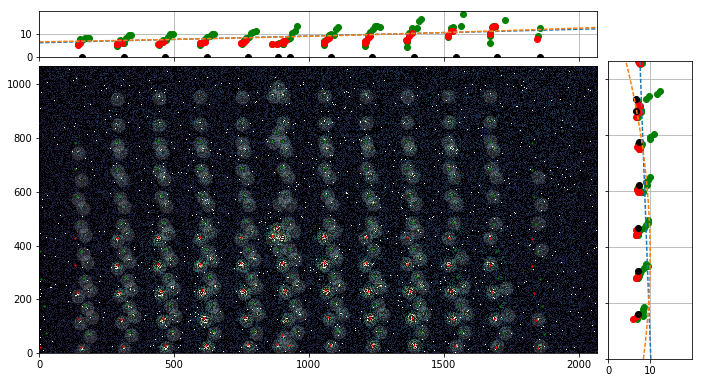

In [3]:
filename = cloudpath + 'Tests-at-FortSumner/170901_perf3.0/170901/focus/image000103stack.fits'
GridMask = Image(filename = filename, quick=False, figsize=12, windowing=True, mask='grid', cloudpath=cloudpath)

#im = Image(filename = files[i], plot = False, stack = True, stack_image = False, 
#           py = True, subDark = False, verbose = True, quick = True, Type = 'detector', Fits = True)

0 over 1




      START IMAGE ANALYSIS 




reading parameters...
centre = None
To extract the sources: fwhm = 8, threshold = 10
image saved


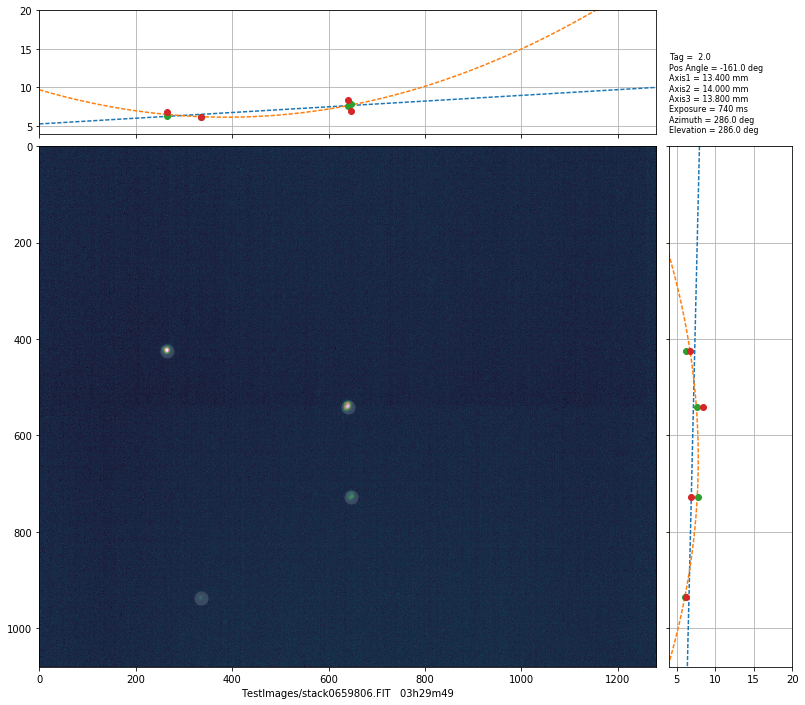

In [4]:
files = [] 
files = glob.glob('TestImages/stack0659806.FIT')[::-1]
images=[]
for i in range(int(len(files))):
    print ('{} over {}'.format(i,len(files)))
    im = Image(filename = files[0])
    images.append(im)

## Working with the .csv

+ An interesting feature of the code is that the .CSV file generated (containing each spot info: PSF FWHM, centroid, EE, flux, wavelength...) can then be open with TopCat which gives a lot of possibilities in terms of analysis and data visualization.
+ Also, predicted and detected.reg can both be wisualize with DS9 to supervise the work 

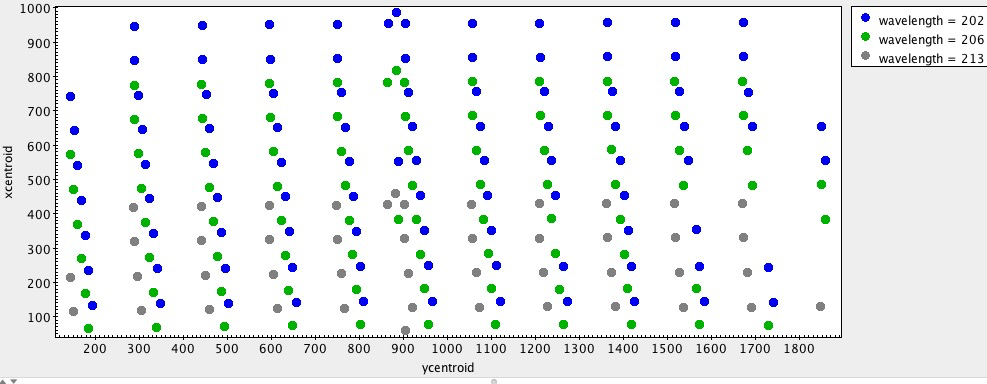

In [5]:
image = "TestImages/topcat.png"
imdisplay(filename=image)


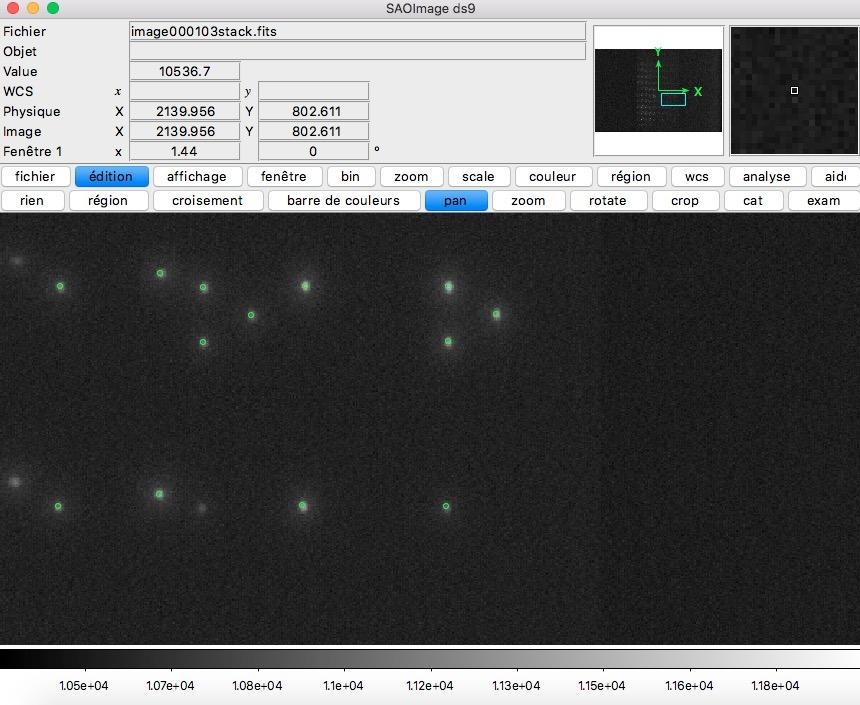

In [20]:
image = "TestImages/detected.png"
imdisplay(filename=image)

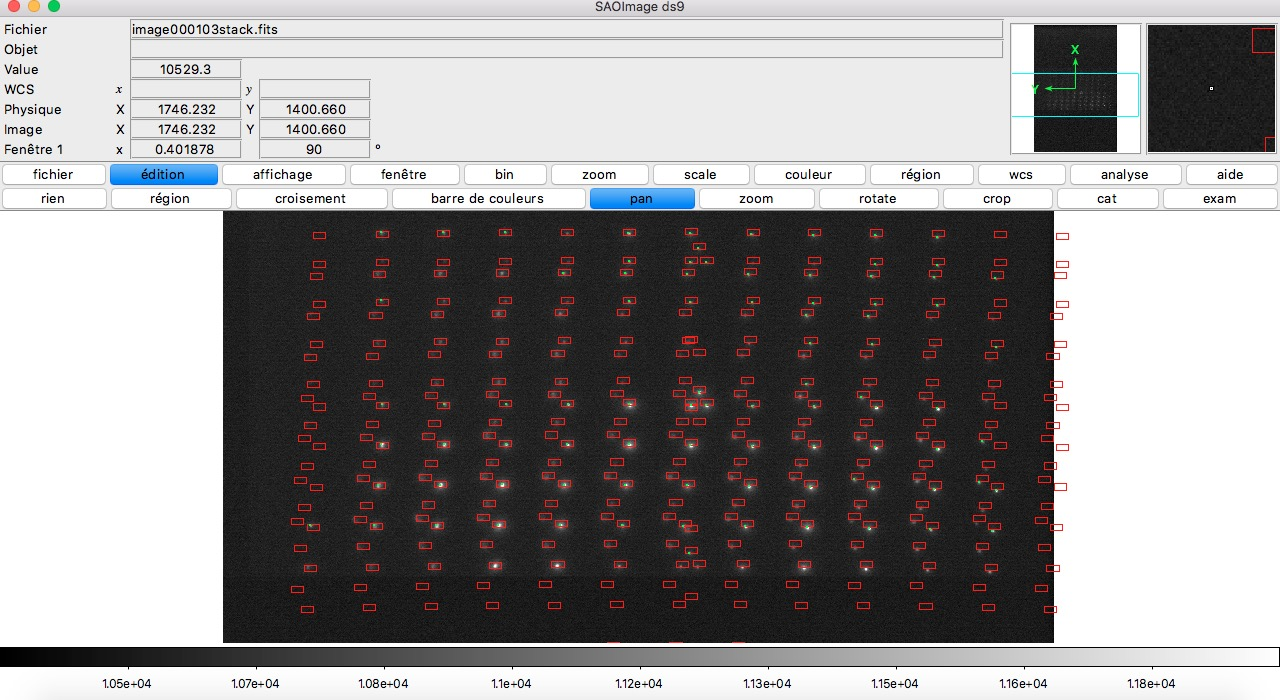

In [21]:
image = "TestImages/predicted.png"
imdisplay(filename=image)

# 2. Image quality<a class="anchor" id="Image quality"></a>
[Back to TOC](#TOC)

+ As an important change of the instrument is the replacement of FF1+SC1 we will need to verify that most of the scattering is no longer here and quantify the performance of the instrument. 


Returns and plot:


+ radial profile with fit analysis exp + gauss
+ Encircled energy



+ It can be use with the direct object create by the Image class
+ For now we use a gaussian + exp **Decomposition** but may change it




## 1.2 Parameters

- **Mandatory**
  + `data` *2D array* : data of the image
  + `center` *Boolean* : Very center of the spot to analyze (eg, [567,678])

- **Optionnal and Important**
  + `size` *int*: Size of the radial profile (`default: 40`).
  + `radius` *int*: radius on beyond which is estimated the background (see n) (`default: 40`).
  + `n` *float*:  adius rapport on which you want to estimate background for background substraction. With 1.3 the the background will be estimated on pixels in the anulus betweent radius and radius*n(`default: 1.5`).
  + `platescale` *float*: If given, the rdial profile is given an arcsec[DA], in pixel if None (`default: None`).
  + `center_type` *string*:  If None, the very center is use, else can be 'maximum' or 'barycentre'(`default: None`).
  + `maxplot, minplot` *float*: If the plot does not work by itself you can specify it (`default: 0.013, -1e-5`).


new_center = [ 213.81645394  143.06648174], definied with center type: barycentre


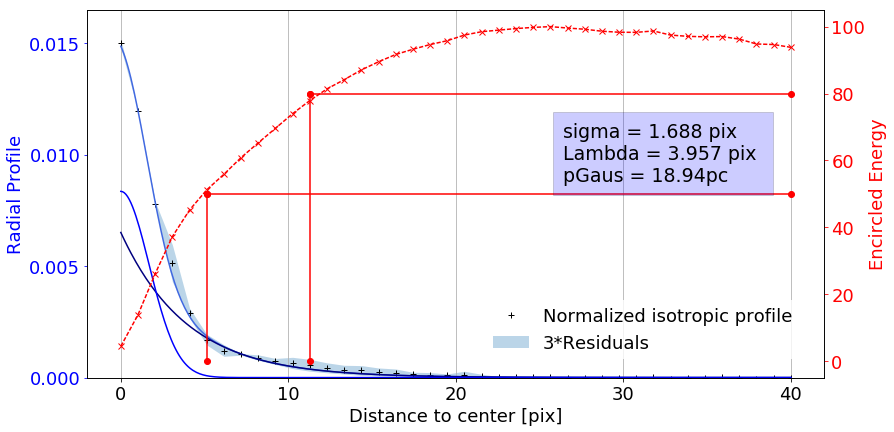

In [24]:
im = GridMask
popt, x, radial_profile = plot_rp2_wo_latex(im.image, [int(im.table['xcentroid'][0]),int(im.table['ycentroid'][0])],radius = 30)#,n=1.3,platescale = 12,radius = 55,center_type = None)#, maxplot=0.006)#, maxplot=0.002,radius_ext=15)



new_center = [ 264.03297613  424.44244761], definied with center type: barycentre


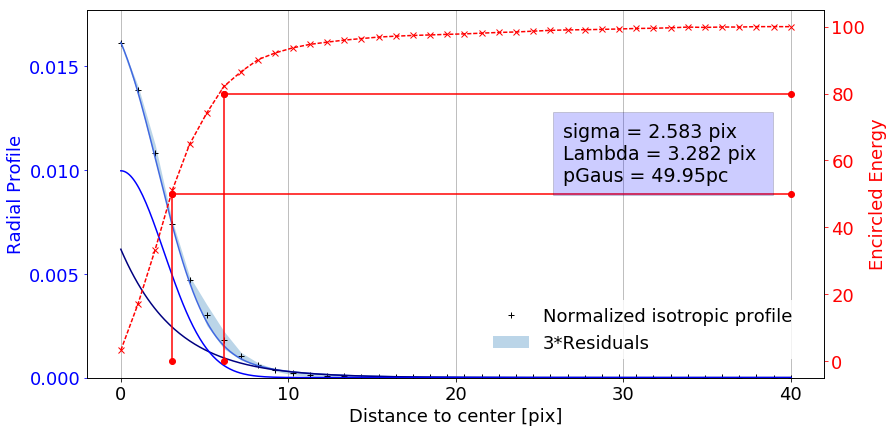

In [25]:
im = images[0]
popt, x, radial_profile = plot_rp2_wo_latex(im.image, [int(im.table['xcentroid'][0]),int(im.table['ycentroid'][0])])#,n=1.3,platescale = 12,radius = 55,center_type = None)#, maxplot=0.006)#, maxplot=0.002,radius_ext=15)




new_center = [ 1271.68841512   886.90174016], definied with center type: barycentre


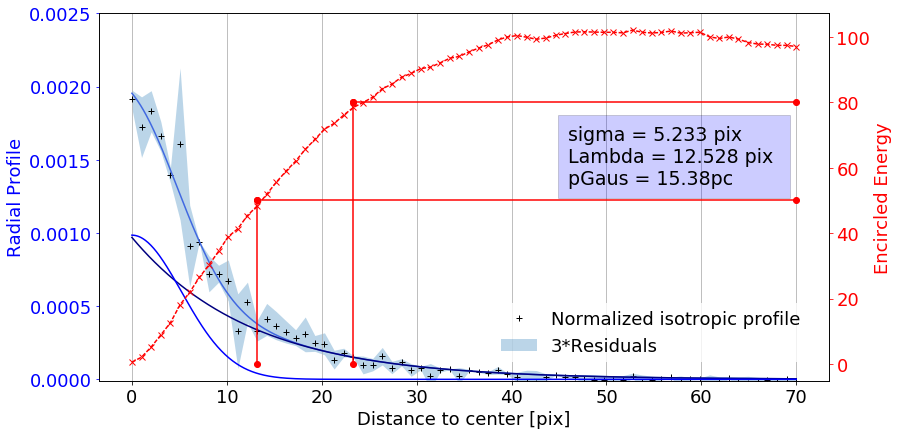

In [7]:
filen = cloudpath + 'Tests-at-FortSumner/170923_Autocoll2/170923/image000098.fits'
a,b,c = plot_rp2_wo_latex(fits.open(filen)[0].data,center=[1272,888], maxplot=2.5e-3,size=70)

# 3. Dispersion analysis<a class="anchor" id="Dispersion analysis"></a>
[Back to TOC](#TOC)

+ To be Explain
+ Still being implemented

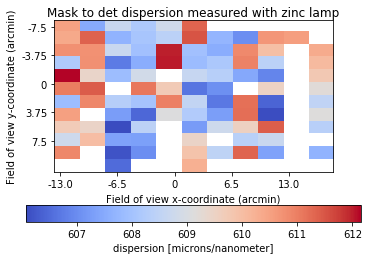

In [31]:
x,y,disp = GridMask.CalculateDispersion()

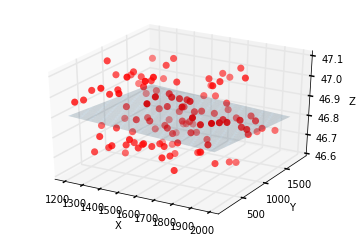

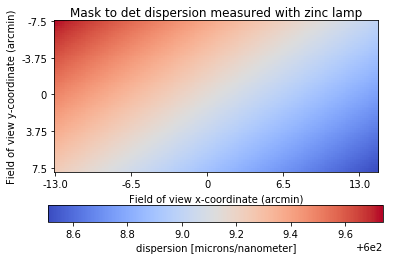

In [32]:
interpDispersion(x,y,disp, order=1)

+ Be carefull about the dispersion.
- Indeed a 1pix error on the centroiding of each PSF result in a dispersion error of 7mu/nm (what we see here)
+ we should have only  **0.1pix error** to have a good dispersion approximation (0.7mu/nm)
+ Moreover ther is still an uncertainty on the accurate wavelength of the Zn lines. For now we use: 2025.5A, 2061.9A, 2138.2A

# 4. Through slit analysis<a class="anchor" id="Through slit analysis"></a>
[Back to TOC](#TOC)

## 4.1 Explanation of the code

+ Very simple and crude function that returns the max of the flux when doing a through slit

+ Returns the position of the images (given in parameter) and the calculated flux
+ Plot the result



## 4.2 Parameters

- **Mandatory**
  + `path` *String*: path to the detector images of the through slit 
  + `nimages` *list or array*: # of the images. Meaning that if the throughslit goes from images00095.fits to images00110.fits use np.arange(95,111)
  + `pos_image` *list or array*: position of the images. Meaning that if the range is constant (lets say 10 pixel ou 10'') you can  use 10*np.arange(0,16) 
  + `radius` *int*: Number of pixel for the radius of the sub-image on which you want to calculate the flux (sum of the pixels)
  + `center` *list*: Approximative center of the slit in pixel (ex [1230,678]) 


- **Optionnal and secondary**
  + `n_bg` *float*: radius rapport on which you want to estimate background for background substraction. With 1.3 the the background will be estimated on pixels in the anulus betweent radius and radius*n_bg(default n=1.3)

Sum pixel is used (another estimator may be prefarable)


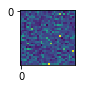

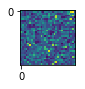

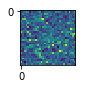

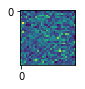

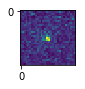

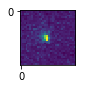

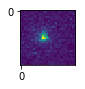

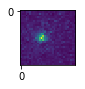

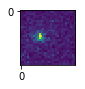

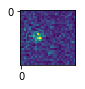

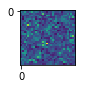

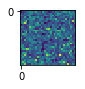

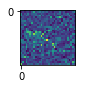

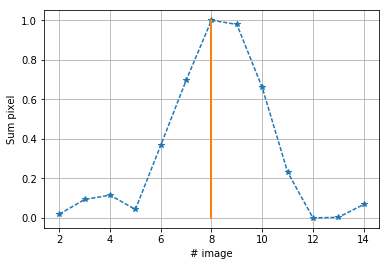

In [10]:
path_images = cloudpath + 'Tests-at-FortSumner/170923_SC_GUI03/Detector/170924/'
pos_image, flux = through_slit(path=path_images, nimages=np.arange(2,15), pos_image=np.arange(2,15), radius=15, center=[933,1450], sizefig = 1, n_bg=1.3)

# 5 Stacking<a class="anchor" id="Stacking"></a>
[Back to TOC](#TOC)

+ stacking (+shift if drift)
+ Remove the dark current map + background map if needed
+ save the output in the same folder



In [14]:
path = cloudpath + 'Test_LAM/scatteredlight/Scatter_SC1_20180411-SimSpectroAligned/'
DS = stackImages(path = path + 'DS/')


Reading fits files...
Images stacked
Stacked image save at: /home/dvibert/ownCloud/FIREBALL/Test_LAM/scatteredlight/Scatter_SC1_20180411-SimSpectroAligned/DS/204nm3nm_30s_aligned_DSS1stack.fits



Reading fits files...
Re-centering images...
Images stacked
Stacked image save at: /home/dvibert/ownCloud/FIREBALL/Test_LAM/scatteredlight/Scatter_SC1_20180411-SimSpectroAligned/Flux/204nm3nm_30s_alignedS4stack.fits


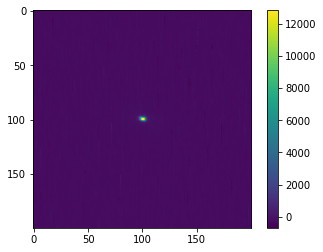

In [16]:
imstack = stackOnCentroid(path = path + 'Flux/', center = [284,864], DS=DS, radius=[20,20], size=100)
plt.imshow(imstack);plt.colorbar()

#  Final remarks<a class="anchor" id="Final remarks"></a>
[Back to TOC](#TOC)

+ You can put here your remarks, questions, ideas to improves, etc